### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 





### Business Goal
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

How are we going to proceed with the assignment

1. Read and do basic understanding of the columns
2. Do data cleaning if necessary
3. Viualisation of data
4. Prepare the data for model building
5. Building and training the model
6. Analysis of the model
7. Deploying the model for prediction

### 1. Reading and understanding data

In [321]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [322]:
day_csv = pd.read_csv("day.csv")

In [323]:
day_csv.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [324]:
day_csv.shape

(730, 16)

- There are 16 columns
- 730 Rows of data

In [325]:
day_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Lets look at how the values are distributed

In [326]:
day_csv.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Lets look if there are any null values in the data

In [327]:
day_csv.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can clearly see that there are no null values in the data. Also from the above describe output it seems that the data is within limits and no clear outliers are visible

### 2. Do data cleaning if necessary

As explained above since there are no null values or outliers it seems we need not do any data cleaning techniques on this data set


### 3. Viualisation of data

Now lets try to use 2 methods
- Pairplot
- Heatmap 

to understand the relations between various columns

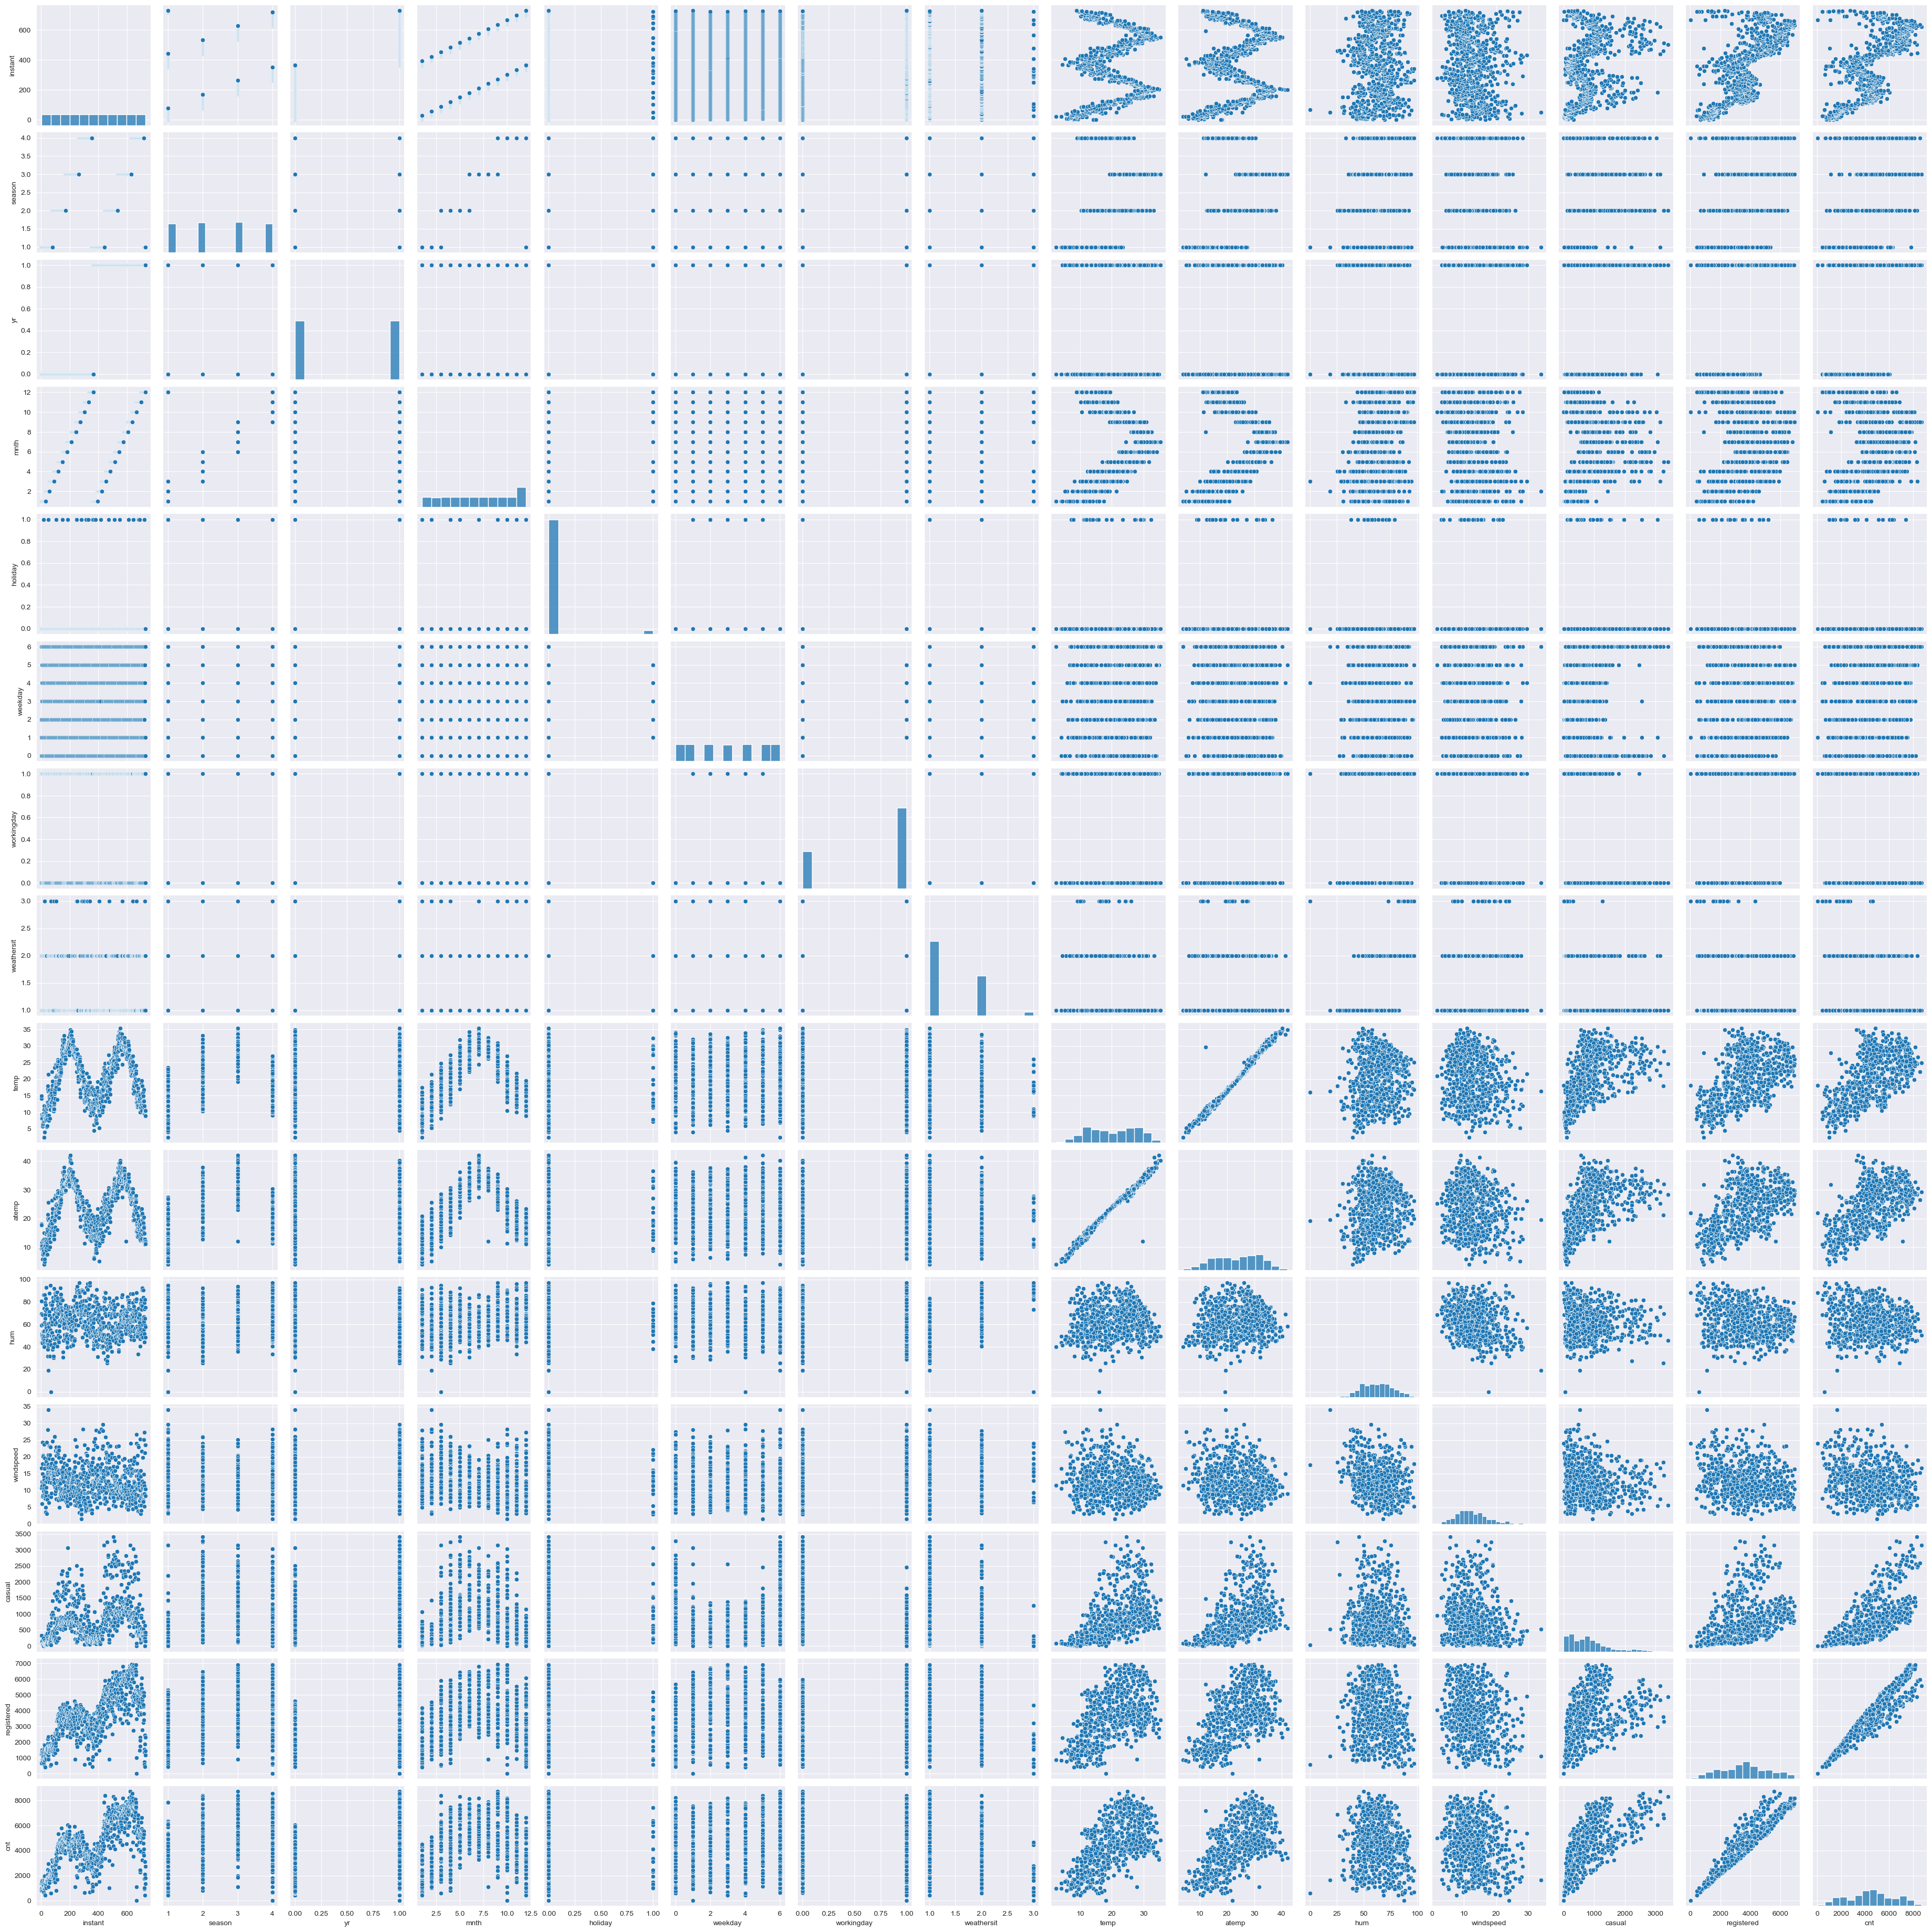

In [328]:
sns.pairplot(day_csv);
plt.show()

- From this it is very clear that when we look at the co-relation of cnt variable, it seems there is a definite corelation with
temp & atemp (We can ignore because atemp is related to temp itself). 
- There is relation of cnt with casual and registered but that is because cnt = casualt + registered and hence can be ignored

We can also verify the same thing using heat map. Let us look at the heat map

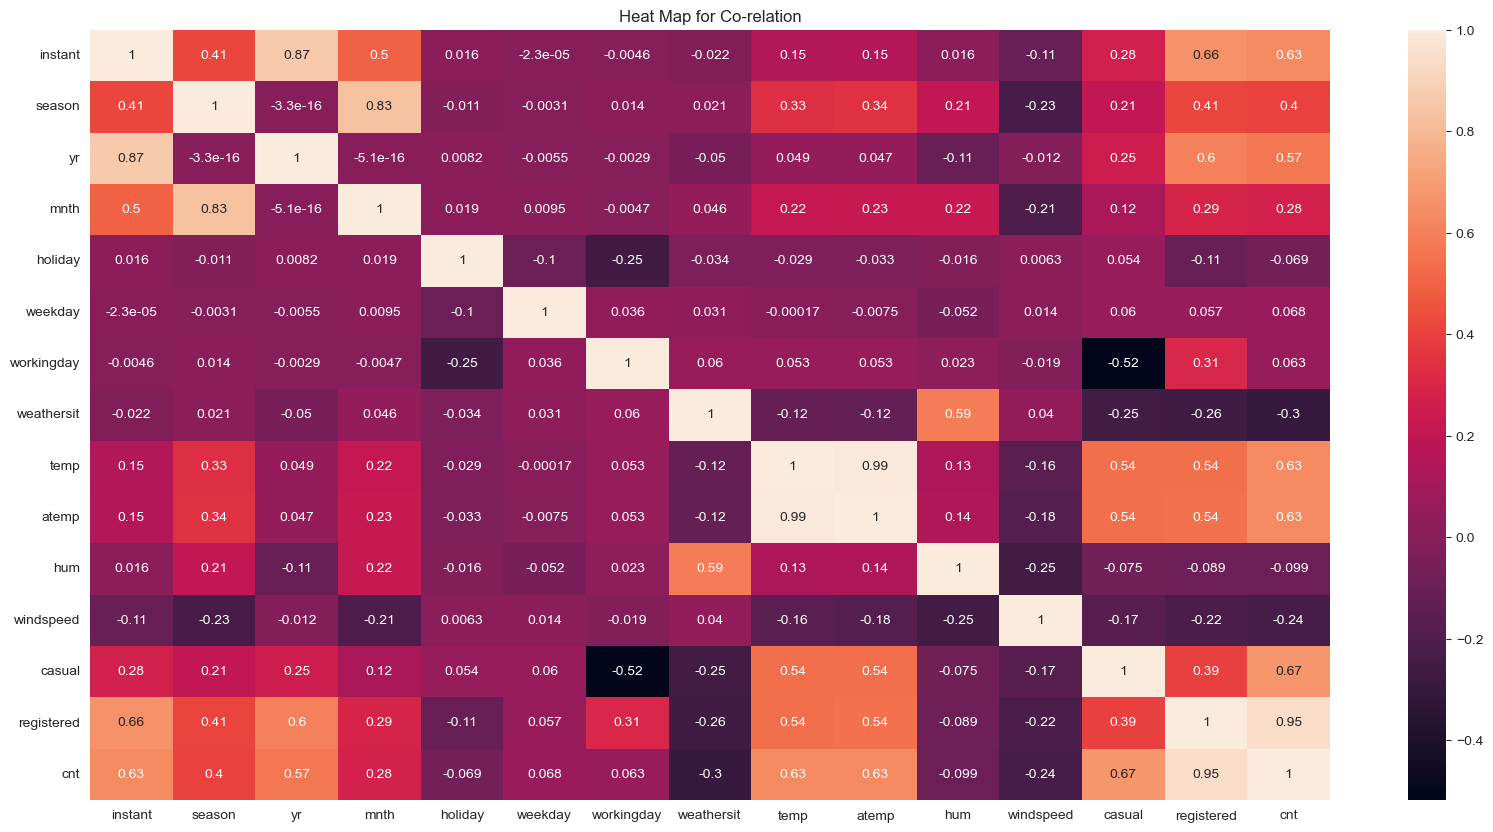

In [329]:
plt.figure(figsize=(20, 10))
sns.heatmap(day_csv.corr(), annot=True)
plt.title('Heat Map for Co-relation')
plt.show()

- Here also we can see that the highest co-relation of 0.63 for cnt is with temperature

### Categorical Data Visualisation

We can clearly see from the data dictionary that there are a few category variables which are represented as numbers. 
Let us bring those in to use box plot to make sense if there are any patterns emerging

In [330]:
day_csv['Year']=day_csv.yr.map({0: '2018',1:'2019'})
day_csv['DayOfWeek']=day_csv.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
day_csv['Season']=day_csv.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
day_csv['Month']=day_csv.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day_csv['WeatherSituation']=day_csv.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})

day_csv.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,Year,DayOfWeek,Season,Month,WeatherSituation
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,...,80.5833,10.749882,331,654,985,2018,Sat,spring,Jan,Mist + Cloudy
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,...,69.6087,16.652113,131,670,801,2018,Sun,spring,Jan,Mist + Cloudy
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,...,43.7273,16.636703,120,1229,1349,2018,Mon,spring,Jan,Clear
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,...,59.0435,10.739832,108,1454,1562,2018,Tue,spring,Jan,Clear
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,...,43.6957,12.522300,82,1518,1600,2018,Wed,spring,Jan,Clear


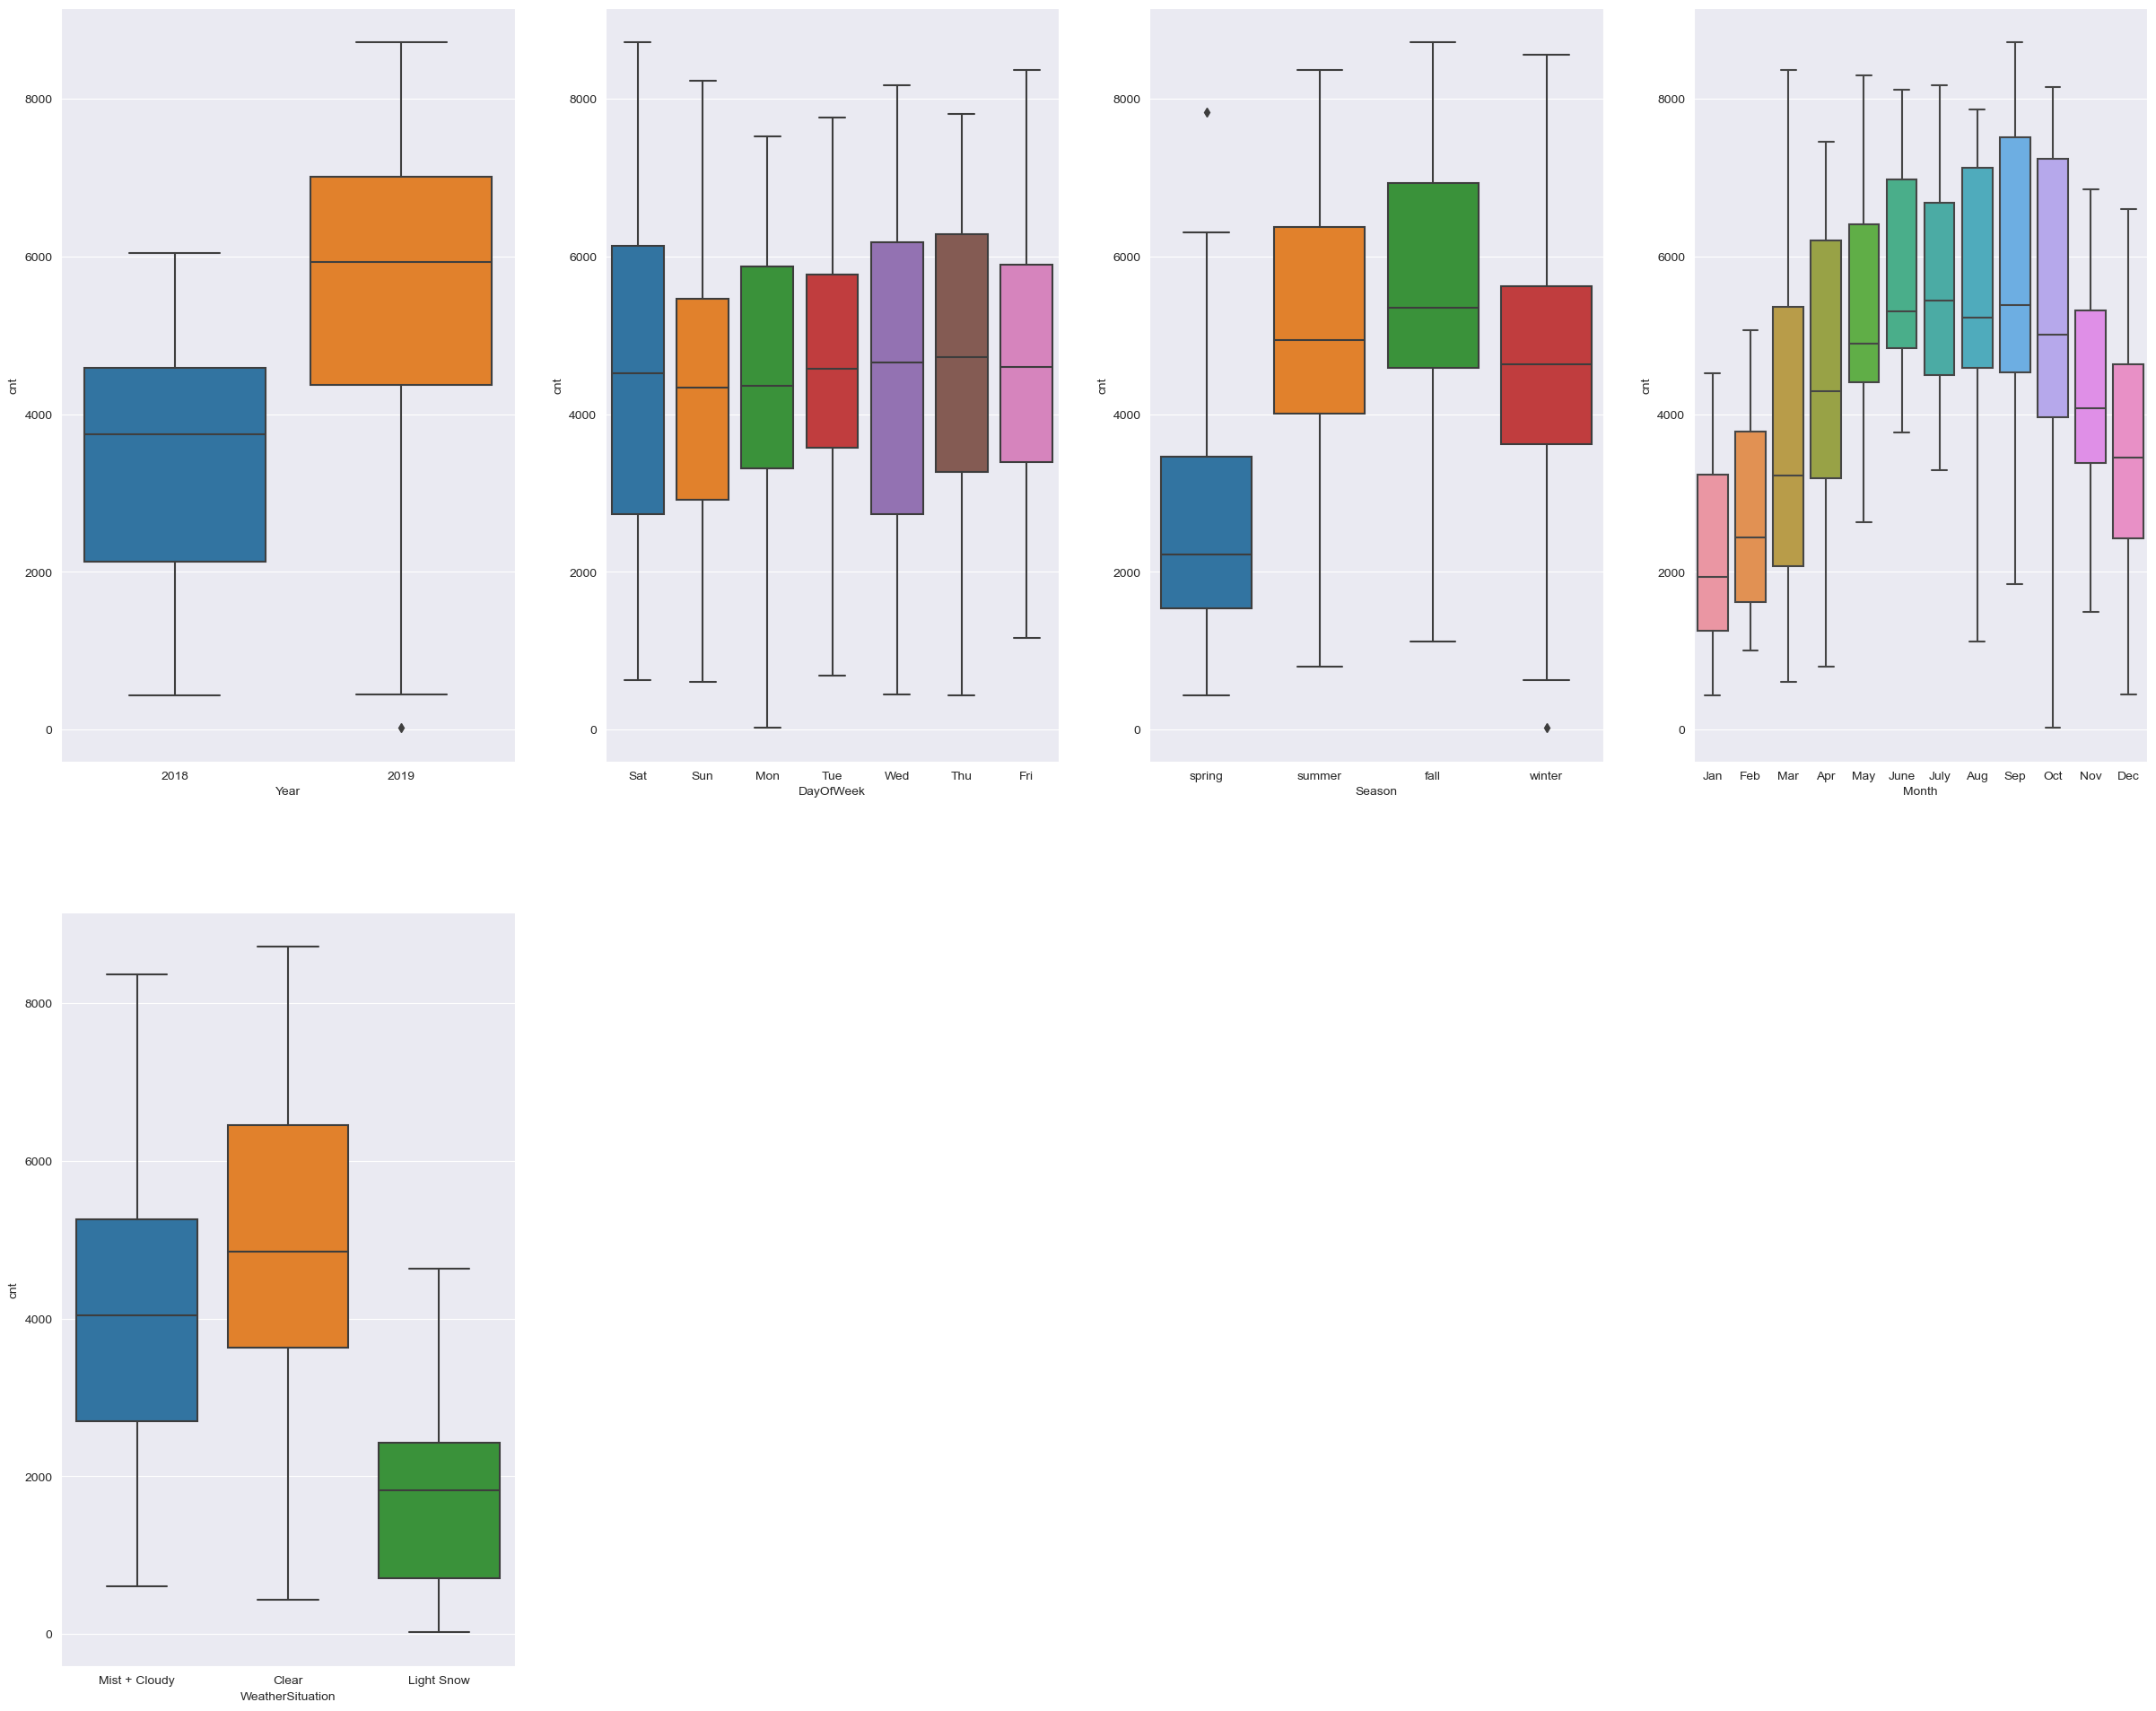

In [331]:
plt.figure(figsize=(30, 24))
plt.subplot(2, 4, 1)
sns.boxplot(x='Year', y='cnt', data=day_csv)
plt.subplot(2, 4, 2)
sns.boxplot(x='DayOfWeek', y='cnt', data=day_csv)
plt.subplot(2, 4, 3)
sns.boxplot(x='Season', y='cnt', data=day_csv)
plt.subplot(2, 4, 4)
sns.boxplot(x='Month', y='cnt', data=day_csv)
plt.subplot(2, 4, 5)
sns.boxplot(x='WeatherSituation', y='cnt', data=day_csv)
plt.show()

Some of the observations from the above graphs
- The demand has already increased in 2019 compared to 2018
- The most demand is on saturday wedenesday and thursday
- The most demand is in the fall season and summer season
- The month of september sees the highest demand
- The demand is higest when the weather is clear

Now that we have some conclusions from the visualizations. Let us first remove some of the not required columns

In [332]:
day_csv.drop(['casual', 'registered', 'atemp', 'instant', 'dteday'], axis = 1, inplace = True)

In [333]:
day_csv.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Year,DayOfWeek,Season,Month,WeatherSituation
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,2018,Sat,spring,Jan,Mist + Cloudy
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2018,Sun,spring,Jan,Mist + Cloudy
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,2018,Mon,spring,Jan,Clear
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,2018,Tue,spring,Jan,Clear
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,2018,Wed,spring,Jan,Clear


- We can drop casual and registered since cnt = casual + registered
- We can drop atemp since it is related to temp
- We can also drop instant since its not important for analysis

In [334]:
day_csv.drop(['season', 'Year', 'mnth', 'weekday', 'weathersit', 'mnth'], axis = 1, inplace = True)

In [335]:
day_csv.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,DayOfWeek,Season,Month,WeatherSituation
0,0,0,0,14.110847,80.5833,10.749882,985,Sat,spring,Jan,Mist + Cloudy
1,0,0,0,14.902598,69.6087,16.652113,801,Sun,spring,Jan,Mist + Cloudy
2,0,0,1,8.050924,43.7273,16.636703,1349,Mon,spring,Jan,Clear
3,0,0,1,8.200000,59.0435,10.739832,1562,Tue,spring,Jan,Clear
4,0,0,1,9.305237,43.6957,12.522300,1600,Wed,spring,Jan,Clear


In [336]:
day_csv.shape

(730, 11)

In [337]:
day_csv.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


In [338]:
day_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   DayOfWeek         730 non-null    object 
 8   Season            730 non-null    object 
 9   Month             730 non-null    object 
 10  WeatherSituation  730 non-null    object 
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [339]:
month = pd.get_dummies(day_csv.Month, drop_first=True)
weekday = pd.get_dummies(day_csv.DayOfWeek, drop_first=True)
weathersit = pd.get_dummies(day_csv.WeatherSituation, drop_first=True)
season = pd.get_dummies(day_csv.Season, drop_first=True)

In [340]:
day_csv = pd.concat([day_csv,month, weekday, weathersit, season], axis=1)
day_csv.head(5)

,yr,holiday,workingday,temp,hum,windspeed,cnt,DayOfWeek,Season,Month,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,Sat,spring,Jan,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,Sun,spring,Jan,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,Mon,spring,Jan,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,Tue,spring,Jan,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,Wed,spring,Jan,...,0,0,0,0,1,0,0,1,0,0


In [341]:
day_csv.drop(['DayOfWeek','Season','Month','WeatherSituation'], axis = 1, inplace = True)
day_csv.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5,0,0,1,8.378268,51.8261,6.000868,1606,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0,1,8.057402,49.8696,11.304642,1510,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,6.765000,53.5833,17.875868,959,0,0,0,...,1,0,0,0,0,0,1,1,0,0
8,0,0,0,5.671653,43.4167,24.250650,822,0,0,0,...,0,1,0,0,0,0,0,1,0,0
9,0,0,1,6.184153,48.2917,14.958889,1321,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [342]:
day_csv.shape

(730, 29)

In [343]:
day_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    uint8  
 8   Dec            730 non-null    uint8  
 9   Feb            730 non-null    uint8  
 10  Jan            730 non-null    uint8  
 11  July           730 non-null    uint8  
 12  June           730 non-null    uint8  
 13  Mar            730 non-null    uint8  
 14  May            730 non-null    uint8  
 15  Nov            730 non-null    uint8  
 16  Oct            730 non-null    uint8  
 17  Sep            730 non-null    uint8  
 18  Mon       

### 4.Prepare the data for model building

In [344]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

day_csv_train, day_csv_test = train_test_split(day_csv, train_size=0.7, random_state=100)

In [345]:
day_csv_train.shape

(510, 29)

In [346]:
day_csv_test.shape

(220, 29)

### Scaling the variables

In [347]:
min_max_scaler = MinMaxScaler()
scaler_variables = ['hum', 'windspeed', 'temp', 'cnt']
day_csv_train[scaler_variables] = min_max_scaler.fit_transform(day_csv_train[scaler_variables])

In [348]:
day_csv_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We can see the min value is 0 and max value is 1 for variables

We had seen that the highest co-relation of cnt was with the temperature. Let us verify that again with a scatter plot

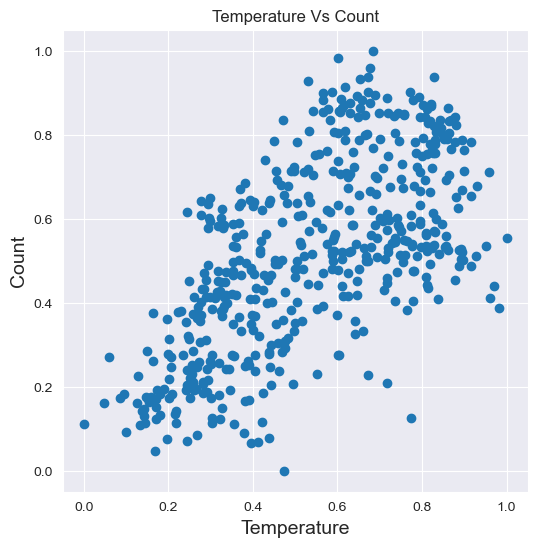

In [349]:
plt.figure(figsize=[6,6])
plt.scatter(day_csv_train.temp, day_csv_train.cnt)
plt.title('Temperature Vs Count')
plt.xlabel('Temperature', fontsize = 14)                          
plt.ylabel('Count', fontsize = 14) 
plt.show()

### 5.Building & Training the Model

In [350]:
y_train = day_csv_train.pop('cnt')
X_train = day_csv_train

In [351]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [352]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [353]:
import statsmodels.api as sm

Since we know that temperature had the highest co-relation with cnt, lets add temp to the model

In [354]:
X_train_sm = sm.add_constant(X_train['temp'])
boombikes = sm.OLS(y_train, X_train_sm)
boombikes_model = boombikes.fit()

Now that we have fit the model lets see the params

In [355]:
boombikes_model.params

const    0.169031
temp     0.640944
dtype: float64

In [356]:
boombikes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.46e-61
Time:                        07:57:09   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared value for the model is 0.416 That means around 42% variance in the count quantity is explained by temperature

Now lets add another variable. Next highest co-relation was the year

In [357]:
X_train_sm = sm.add_constant(X_train[['temp', 'yr']])

boombikes = sm.OLS(y_train, X_train_sm)
boombikes_model = boombikes.fit()

In [358]:
boombikes_model.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [359]:
boombikes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          3.34e-130
Time:                        07:57:09   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared value for the model is 0.692 That means around 69% variance in the count quantity is explained by temperature and year

Now let us try to use RFE to find the required set of columns

In [360]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [361]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

rfe = RFE(linear_regression, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [362]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 13),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 9),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 11),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 10),
 ('Tue', False, 8),
 ('Wed', False, 12),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [363]:
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [364]:
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

In [365]:
X_train_rfe = X_train[columns]

In [366]:
X_train_lm = sm.add_constant(X_train_rfe)

In [367]:
X_train_lm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,July,Sep,Sat,Sun,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,0,0,1,0,0,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,0,0,0,1,0,0,1,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,0,1,0,0,1,0,1,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,1,0,1,0


In [368]:
lm1 = sm.OLS(y_train, X_train_lm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        07:57:09   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.42e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Now Lets check VIF for multicollinearity

In [369]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [370]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Mist + Cloudy,1.57


- We see that the VIF for working day is 50.68. Lets drop it

In [371]:
X_train_rfe = X_train_rfe.drop(['workingday'], axis=1)

In [372]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          2.11e-191
Time:                        07:57:09   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300      0.000       0.216       0.350
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0100      0.011      0.897      0.370      -0.012       0.032
Sun              -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [373]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


- We see that the VIF for humidity is 28.25. Lets drop it

In [374]:
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

In [375]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train, X_train_lm).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.28e-188
Time:                        07:57:09   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2037      0.029      6.972      0.000       0.146       0.261
yr                0.2337      0.008     28.828      0.000       0.218       0.250
holiday          -0.1029      0.026     -3.983      0.000      -0.154      -0.052
temp              0.4915      0.033     15.027      0.000       0.427       0.556
windspeed        -0.1491      0.025     -6.024      0.000      -0.198      -0.100
July             -0.0496      0.018     -2.702      0.007      -0.086      -0.014
Sep               0.0759      0.017      4.537      0.000       0.043       0.109
Sat               0.0118      0.011      1.037      0.300      -0.011       0.034
Sun              -0.0461      0.012     -3.931      0.000      -0.069      -0.023
Light Snow       -0.2895      0.024    -11.880      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0477      0.015      3.180      0.002       0.018       0.077
winter            0.0846      0.017      4.971      0.000       0.051       0.118
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.18
3,windspeed,4.63
11,summer,2.24
10,spring,2.13
0,yr,2.07
12,winter,1.84
4,July,1.59
9,Mist + Cloudy,1.56
5,Sep,1.34
6,Sat,1.23


Now that the VIF is under control let us drop Sat with p value of 0.3

In [377]:
X_train_rfe = X_train_rfe.drop(['Sat'], axis=1)

In [378]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train, X_train_lm).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          1.45e-189
Time:                        07:57:09   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074      0.000       0.149       0.263
yr                0.2335      0.008     28.807      0.000       0.218       0.249
holiday          -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp              0.4907      0.033     15.004      0.000       0.426       0.555
windspeed        -0.1479      0.025     -5.981      0.000      -0.196      -0.099
July             -0.0492      0.018     -2.680      0.008      -0.085      -0.013
Sep               0.0760      0.017      4.541      0.000       0.043       0.109
Sun              -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light Snow       -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0475      0.015      3.171      0.002       0.018       0.077
winter            0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [379]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,July,1.59
8,Mist + Cloudy,1.56
5,Sep,1.34
6,Sun,1.18


Now the VIFs and p-values both are within an acceptable range. Let us use lm_4 as the model. Its R-squared value is 0.841
which means 84 percent of variance is explained by the model

### 6.Analysis of the model

In [380]:
y_train_pred = lm_4.predict(X_train_lm)

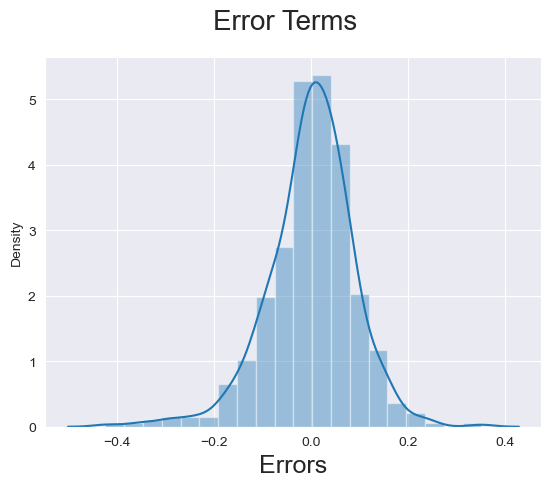

In [381]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

- We can clearly see that the error terms are centred around 0 and follows a normal distribution as expected in linear regression

Let us use QQ plot 

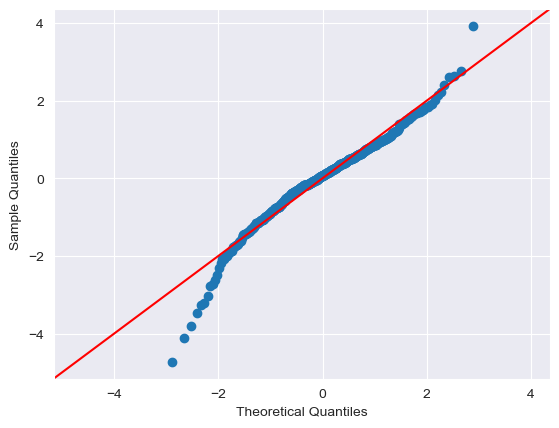

In [382]:
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

- We can clearly see that most of data points lie on straight line 

Scaling test data

In [383]:
day_csv_test[scaler_variables] = min_max_scaler.transform(day_csv_test[scaler_variables])

In [384]:
day_csv_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [385]:
y_test = day_csv_test.pop('cnt')
X_test = day_csv_test

In [386]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [387]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


Scaling the test data

In [388]:
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_4.predict(X_test)

In [389]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

r2_score of train dataset 0.8409034711793522
r2_score of test dataset 0.8079646332676633


- The R2 score of train dataset is 0.84 while that of test dataset is almost 0.81 which is reasonable. 
- This means the model is able to use the learning and apply that on the test data set

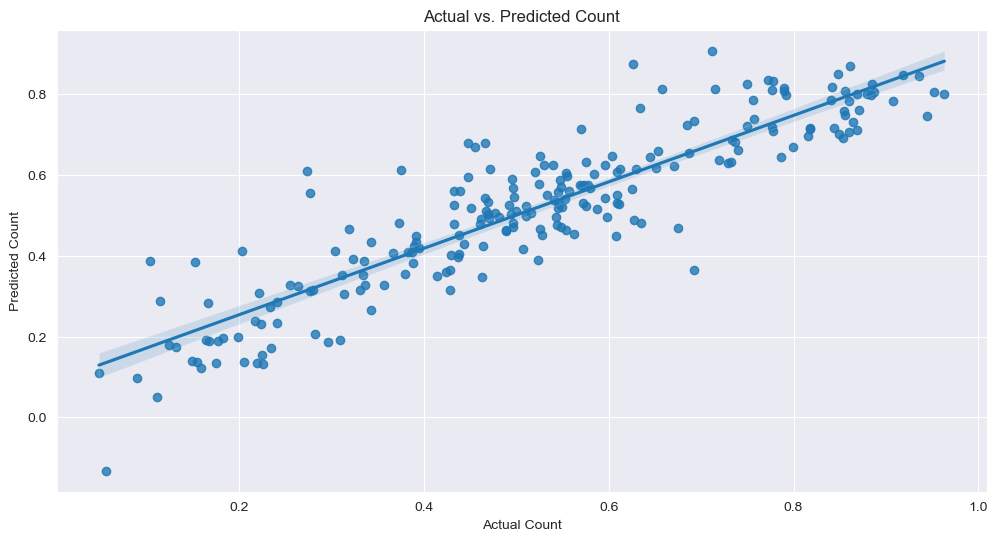

In [390]:
plt.figure(figsize = (12,6))
sns.set_style("darkgrid")
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Actual vs. Predicted Count')
plt.xlabel('Actual Count')
plt.ylabel('Predicted Count')
plt.show()

Now let us make the equation

In [391]:
param = pd.DataFrame(lm_4.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,13))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.490684
1,yr,0.233472
0,const,0.206034
12,winter,0.084806
6,Sep,0.076013
11,summer,0.047536
7,Sun,-0.048345
5,July,-0.049235
10,spring,-0.065521


### By using the above we can see that the equation is

cnt = 0.206 + 0.491 * temp + 0.233 * yr + 0.085 * winter + 0.076 * Sep + 0.047 * summer - 0.048 * Sun - 0.049 * July - 0.065 * spring - 0.08 * (Mist+Cloudy) - 0.105 * holiday - 0.148 * windspeed - 0.289 * Light Snow

### Conclusions

- Temperature is the most important factor determining the demand. Higher the temperature higher the demand
- Demand is high in Winter
- Demand is high in month of september
- Being a holiday negatively impacts the demand
- Weather conditions also negatively impacts the demand. Snow, high wind, cloudy misty weather reduces the demand 